In [2]:
#Imports and settings

import numpy as np
import pandas as pd
import tensorflow as tf
import itertools

import matplotlib.pyplot as plt
import sys
from tqdm.notebook import tqdm

np.set_printoptions(suppress=True)

In [3]:
print('tf version: ', tf.__version__)

tf version:  2.8.0


In [4]:
# load the features and labels (subtract 1 as the labels aren't indexed from 0)
ytest = np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/y_test.txt')-1
ytrain = np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/y_train.txt')-1

In [5]:
ytest

array([4., 4., 4., ..., 1., 1., 1.])

In [6]:
# load the x,y,z body accelerations test data
xx_test=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_x_test.txt')
yy_test=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_y_test.txt')
zz_test=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_z_test.txt')
# concatenate the arrays along the last dimension
xtest = np.concatenate((xx_test[:,:,None],yy_test[:,:,None],zz_test[:,:,None]),axis=2)
# (using None here adds an extra dimension of size 1 to the end of the array)

In [7]:
xtest.shape

(2947, 128, 3)

In [8]:
# follow the same approach for the train data
xx_train=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_x_train.txt')
yy_train=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_y_train.txt')
zz_train=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_z_train.txt')
xtrain = np.concatenate((xx_train[:,:,None],yy_train[:,:,None],zz_train[:,:,None]),axis=2)

In [9]:
print(xtrain.shape)
print(xtest.shape)

(7352, 128, 3)
(2947, 128, 3)


In [10]:
xx.shape

NameError: name 'xx' is not defined

plot one example data sample from
each of the body_acc_x_test, body_acc_y_test, and body_acc_z_test files for each of walking, sitting, standing, and
laying

In [11]:
ytest[112]

2.0

In [12]:
ytrain.shape

(7352,)

In [13]:
xtest.shape[1]

128

In [14]:
ytest[1]   # this is 4 so sitting

4.0

In [15]:
xtest

array([[[ 0.01165315, -0.02939904,  0.1068262 ],
        [ 0.01310909, -0.03972867,  0.1524549 ],
        [ 0.01126885, -0.05240586,  0.2168462 ],
        ...,
        [ 0.00129151,  0.01173502,  0.00366559],
        [ 0.00147   ,  0.00951741,  0.00404194],
        [ 0.00257384,  0.00730507,  0.00488844]],

       [[ 0.00927963,  0.00665052, -0.02631933],
        [ 0.00492971,  0.01864973, -0.02688753],
        [ 0.0039536 ,  0.0155395 , -0.03663861],
        ...,
        [ 0.0077876 ,  0.00473062,  0.01412899],
        [ 0.00343349, -0.00461985,  0.00133805],
        [-0.00123868, -0.01322889, -0.01703861]],

       [[ 0.00573194,  0.00730484,  0.01021286],
        [ 0.00706565,  0.00733091,  0.01341419],
        [ 0.00510976,  0.00715346,  0.00364656],
        ...,
        [-0.00074285, -0.00962914, -0.00250092],
        [-0.00192336, -0.00642597, -0.00252495],
        [-0.00430462, -0.00793205, -0.00314011]],

       ...,

       [[-0.1476465 ,  0.00551979,  0.01025031],
        [-0

In [16]:
xtest[1, :, 0]  # matrix 1, all rows, col 0 corresponds to body_acc_x_test

array([ 0.00927963,  0.00492971,  0.0039536 ,  0.00921443,  0.01615613,
        0.0140794 ,  0.01310521,  0.02124696,  0.02682344,  0.03105437,
        0.03788606,  0.02646287, -0.02144115, -0.06056795, -0.02472538,
        0.02027213, -0.00193409, -0.00890671,  0.00953767, -0.00433166,
       -0.00186384,  0.00495507, -0.00533614,  0.00200079, -0.00170752,
       -0.0064635 ,  0.00020412, -0.00364001,  0.00008268, -0.00144162,
       -0.00595939,  0.00034399,  0.000558  ,  0.00238143,  0.00182778,
       -0.00145607, -0.00020006, -0.00057041,  0.00260494,  0.00264362,
        0.00159703,  0.00381778,  0.00164798,  0.00294322,  0.00558164,
        0.0062567 ,  0.00516898, -0.00252123, -0.00636261, -0.00249661,
        0.00245527,  0.00442356,  0.00211023, -0.00055879, -0.00294425,
       -0.0012469 ,  0.00284826,  0.00235456,  0.00272098,  0.00325529,
        0.00130108,  0.00129151,  0.00147   ,  0.00257384,  0.00573194,
        0.00706565,  0.00510976,  0.00243396,  0.00202394,  0.00

In [17]:
##TO DO: RANDOMISE
#walking    label 1   sample 94
#sitting    label 4   sample 187
#standing   label 5   sample 1
#laying     label 6   sample 212

In [18]:
num = [0,1,2,3]
samples = [94, 187, 1, 212]
activity = ['walking', 'sitting', 'standing', 'laying']

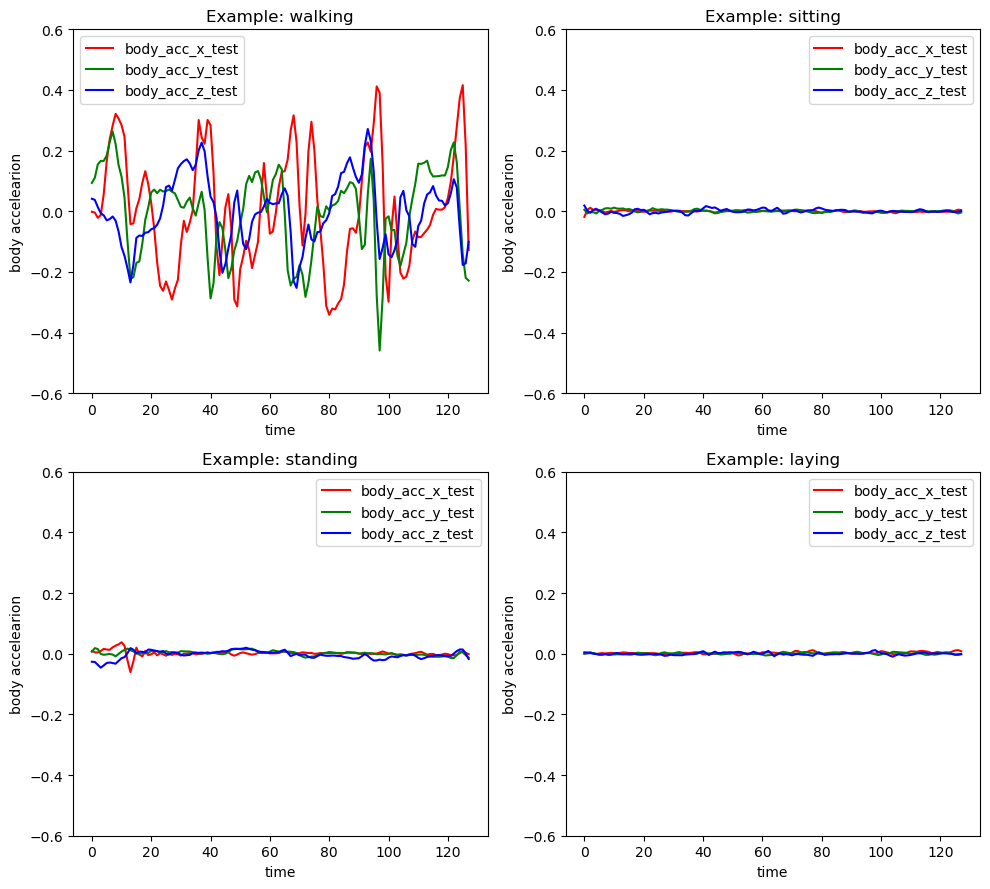

In [19]:
# Plotting examples of activites for body acceleration
fig, axs = plt.subplots(2,2, figsize=(10, 9), tight_layout=True)
fig.subplots_adjust(hspace = .5, wspace=.005)
time_series = np.arange(xtest.shape[1])
axs = axs.ravel()

import itertools
for (i,j,ax) in zip(samples,activity, num):
        axs[ax].plot(time_series, xtest[i, :, 0], color ='red', label='body_acc_x_test')
        axs[ax].plot(time_series, xtest[i, :, 1], color ='green', label='body_acc_y_test')
        axs[ax].plot(time_series, xtest[i, :, 2], color ='blue', label='body_acc_z_test')
        axs[ax].set(title=f'Example: {j}', xlabel='time', ylabel='body accelearion');
        axs[ax].legend()
        axs[ax].set_ylim(-0.6, 0.6)
    
             
plt.show()

#### Split the training data set into two using an 80:20 split, so that you have a train data array and a validation data array

In [20]:
from sklearn.model_selection import train_test_split

x_input, X_val, y_input, y_val = train_test_split(xtrain, ytrain, test_size=0.2, random_state=10)


#### You should now create a **single‐layer neural network to classify activities** based on each value of the body acceleration data for the 3 coordinates

In [21]:
#one-hot encoding for labels
y_input = tf.keras.utils.to_categorical(y_input)
y_val = tf.keras.utils.to_categorical(y_val)

In [22]:
y_input.shape

(5881, 6)

In [24]:
#reshaping
x_input = tf.reshape(x_input, (-1,128*3))
print ('X_train samples = ' + str(x_input.shape))

X_val = tf.reshape(X_val, (-1,128*3))
print ('X_val samples = ' + str(X_val.shape))

print ('y_input samples = ' + str(y_input.shape))
print ('y_val samples = ' + str(y_val.shape))

X_train samples = (5881, 384)
X_val samples = (1471, 384)
y_input samples = (5881, 6)
y_val samples = (1471, 6)


In [25]:
#change dtype for consistency
x_input = tf.cast(x_input, dtype=tf.float32)
X_val = tf.cast(X_val, dtype=tf.float32)
y_input = tf.cast(y_input, dtype=tf.float32)
y_val = tf.cast(y_val, dtype=tf.float32)
x_input.dtype

tf.float32

In [26]:
# Set up logging jupiterhub tensorboard
logdir = '/home/jovyan/logs/Project'
writer = tf.summary.create_file_writer(logdir)

In [29]:
#Create weight tensors
W = tf.Variable(tf.zeros([384,6]),name='W', dtype=tf.float32)
b = tf.Variable(tf.zeros([6]),name='b', dtype=tf.float32)

# predicted probability for each class
def y_pred(x):
    return tf.nn.softmax(tf.matmul(x,W) + b)

    
# cross entropy loss function
@tf.function
def loss(x,y):
    y_ = y_pred(x)
    return tf.reduce_mean(-tf.reduce_sum(y * tf.math.log(y_), axis=[1]))

#accuracy
def accuracy(x,y):
    y_ = y_pred(x)
    # calculate where the prediction equals the label
    correct = tf.math.equal(tf.math.argmax(y_,axis=-1),tf.math.argmax(y,axis=-1))
    # convert to a float (previously boolean)
    correct = tf.cast(correct,dtype=tf.float32)
    # return the mean to give the overall accuracy
    return tf.math.reduce_mean(correct)

In [30]:
# Selecting training parameters
epochs = range(500)

# learning rate
lr = 1e-1

# gradient descent optimizer
optimizer = tf.optimizers.SGD(lr)

In [32]:
with writer.as_default():
    for i in tqdm(epochs):
        with tf.GradientTape() as tape:
            loss_train = loss(x_input, y_input)
        gradients = tape.gradient(loss_train, [W, b])
        optimizer.apply_gradients(zip(gradients, [W ,b]))
        # calculate the validation accuracy
        val_acc = accuracy(X_val,y_val)
        # write the value to tensorboard
        tf.summary.scalar('val_acc', val_acc, step=i)
        tf.print('val_acc', val_acc, output_stream=sys.stdout)

  0%|          | 0/500 [00:00<?, ?it/s]

val_acc 0.202583283
val_acc 0.202583283
val_acc 0.202583283
val_acc 0.202583283
val_acc 0.202583283
val_acc 0.203263089
val_acc 0.203263089
val_acc 0.203263089
val_acc 0.202583283
val_acc 0.202583283
val_acc 0.203263089
val_acc 0.203942895
val_acc 0.203942895
val_acc 0.203942895
val_acc 0.203942895
val_acc 0.203942895
val_acc 0.205302522
val_acc 0.205302522
val_acc 0.205302522
val_acc 0.205302522
val_acc 0.205982327
val_acc 0.205982327
val_acc 0.205982327
val_acc 0.205982327
val_acc 0.205982327
val_acc 0.205982327
val_acc 0.207341939
val_acc 0.207341939
val_acc 0.20802176
val_acc 0.20802176
val_acc 0.20802176
val_acc 0.20802176
val_acc 0.20802176
val_acc 0.20802176
val_acc 0.20802176
val_acc 0.20802176
val_acc 0.20802176
val_acc 0.20802176
val_acc 0.20802176
val_acc 0.20802176
val_acc 0.208701566
val_acc 0.208701566
val_acc 0.208701566
val_acc 0.209381372
val_acc 0.208701566
val_acc 0.208701566
val_acc 0.208701566
val_acc 0.20802176
val_acc 0.20802176
val_acc 0.20802176
val_acc 0.20870

In [141]:
X_train.shape

TensorShape([5881, 384])